<a href="https://colab.research.google.com/github/gmitt98/Ames-Housing-ML/blob/main/Ames_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# add the case shiller price index to the data in order to incorporate national price trends
ames = 'https://bootcamp-proj-4.s3.us-west-1.amazonaws.com/AmesHousing.csv'
case_shiller = 'https://bootcamp-proj-4.s3.us-west-1.amazonaws.com/cs_index_us.csv'

ames_df = pd.read_csv(ames)
cs_df = pd.read_csv(case_shiller)

In [48]:
ames_df = ames_df.merge(cs_df, left_on = 'Yr Sold', right_on = 'Year', how = 'left')
ames_df.drop(columns = ['Year'], inplace = True)

In [49]:
ames_df['Total SF'] = ames_df['Total Bsmt SF'] + ames_df['1st Flr SF'] + ames_df['2nd Flr SF']

In [50]:
numerical_features = ames_df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    ames_df[feature].fillna(ames_df[feature].median(), inplace=True)

In [51]:
categorical_features = ames_df.select_dtypes(include=[np.object]).columns.tolist()
for feature in categorical_features:
    ames_df[feature].fillna('None', inplace=True)

<ipython-input-51-f9aa48ba4269>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = ames_df.select_dtypes(include=[np.object]).columns.tolist()


In [52]:
numeric_data = ames_df.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())

In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

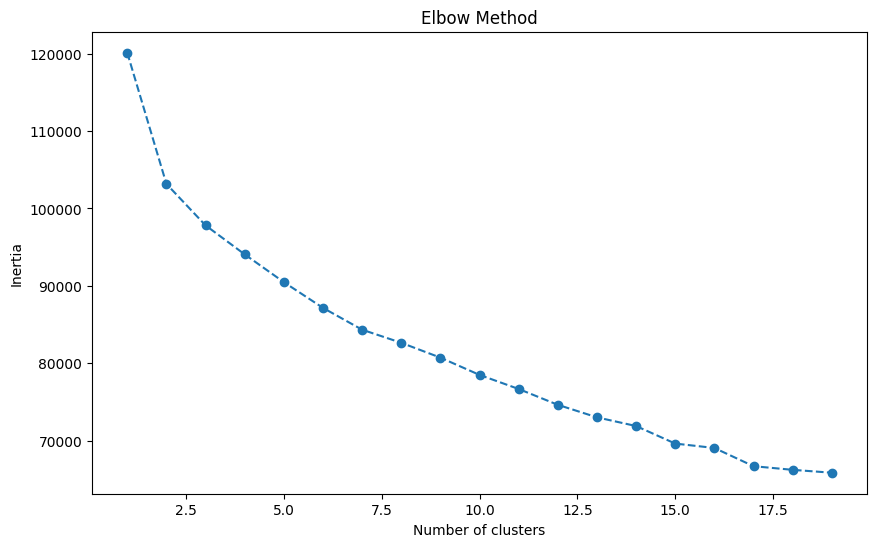

In [54]:
inertia = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [55]:
ames_df['Cluster'] = clusters

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
cluster_summary = ames_df.groupby('Cluster').mean()
print(cluster_summary[['Lot Area', 'Total SF', 'SalePrice']])

             Lot Area     Total SF      SalePrice
Cluster                                          
0        12383.110774  3261.277693  251156.647951
1         8733.711058  2044.235434  128068.256837
2         9106.034621  2118.793609  134642.311585
3        10882.559647  2949.229750  228863.689249


<ipython-input-63-7967ed4581ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = ames_df.groupby('Cluster').mean()


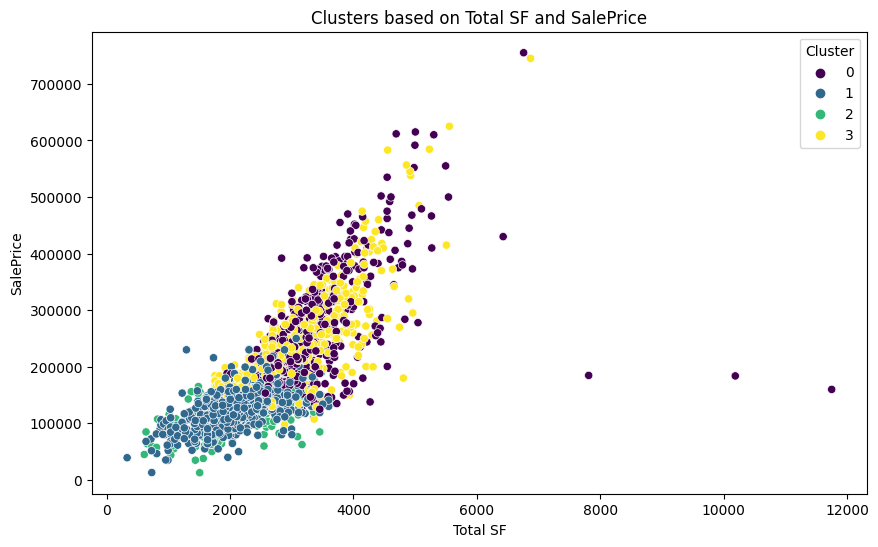

In [65]:
plt.figure(figsize=(10, 6))
x_val = 'Total SF'
y_val = 'SalePrice'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

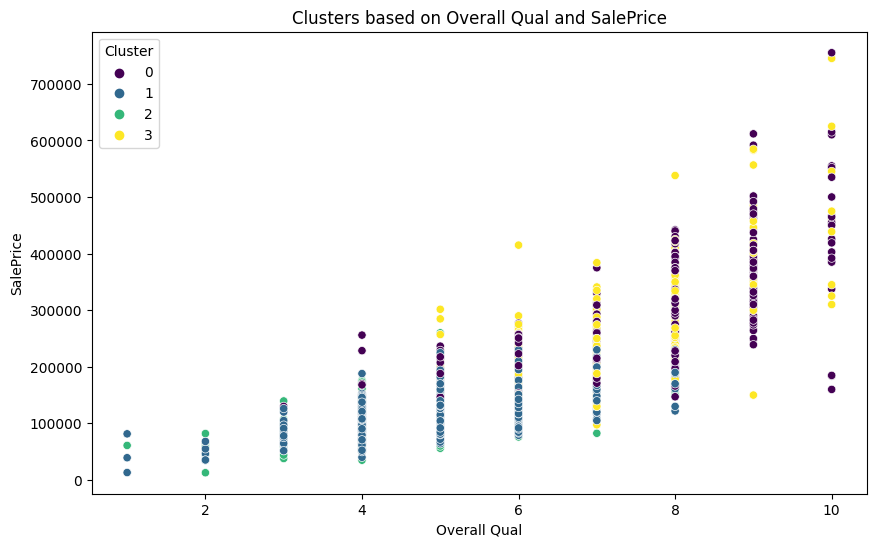

In [67]:
plt.figure(figsize=(10, 6))
x_val = 'Overall Qual'
y_val = 'SalePrice'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

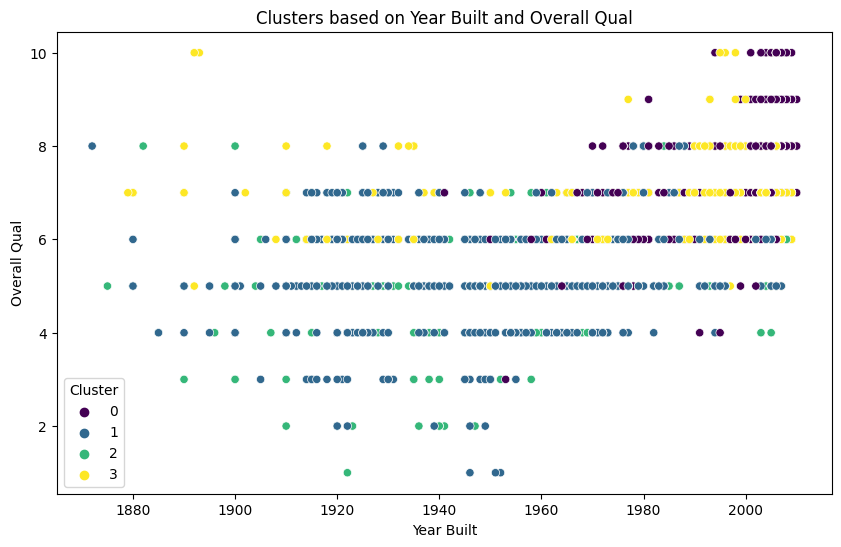

In [68]:
plt.figure(figsize=(10, 6))
x_val = 'Year Built'
y_val = 'Overall Qual'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()

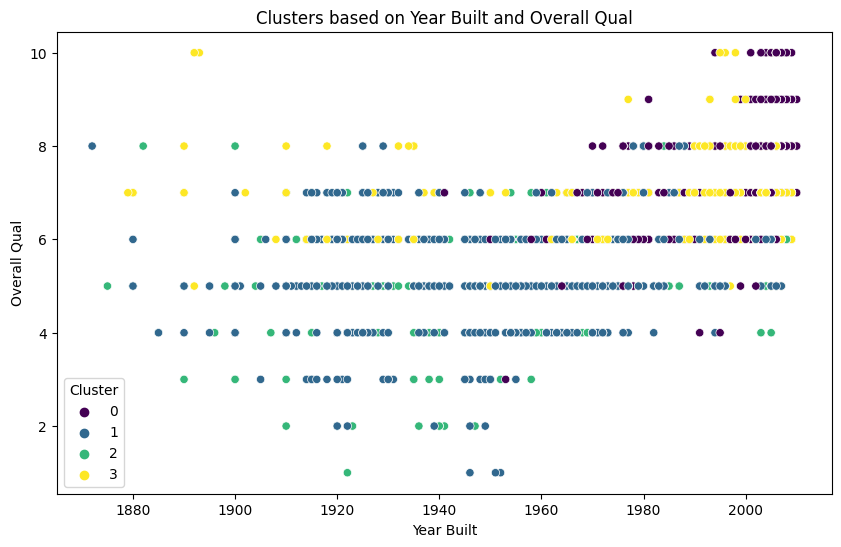

In [61]:
plt.figure(figsize=(10, 6))
x_val = 'Year Built'
y_val = 'Overall Qual'
sns.scatterplot(data=ames_df, x=x_val, y=y_val, hue='Cluster', palette='viridis')
plt.title(f'Clusters based on {x_val} and {y_val}')
plt.show()